In [2]:
import xgboost as xgb
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lib.real_examples as real_examples
import lib.print
import lib.dump

%matplotlib inline


%load_ext autoreload
%autoreload 2

In [7]:
model_type='GBDT'
NAME, X, model = real_examples.get_boston(model_type)

In [11]:
DATA_PATH=f'./data/{NAME}/'
!mkdir -p {DATA_PATH}
BST_NAME=f'{DATA_PATH}/bst_{NAME}.file'
DATA_NAME=f'{DATA_PATH}/{NAME}.csv'
SHAP_ORIG_NAME=f'{DATA_PATH}/shap_original_{NAME}.csv'


In [12]:
with open(BST_NAME, "w") as f:
    lib.dump.dump_trees(model, f, X.columns, model_type)

In [16]:
pd.DataFrame(X).to_csv(DATA_NAME, index=False)

In [17]:
%%time
# compile before running
#banzhaf
!time ./build/shap_banzhaf f {BST_NAME} {DATA_NAME}
# our version of shap
!time ./build/shap_banzhaf h {BST_NAME} {DATA_NAME}
# original implementaiton of shap of shap
!time ./build/shap_banzhaf o {BST_NAME} {DATA_NAME}


data read
banzhaf_fast: 
0.07user 0.00system 0:00.08elapsed 98%CPU (0avgtext+0avgdata 5420maxresident)k
0inputs+128outputs (0major+348minor)pagefaults 0swaps
data read
shap_fast: 
0.26user 0.01system 0:00.27elapsed 99%CPU (0avgtext+0avgdata 5444maxresident)k
0inputs+128outputs (0major+352minor)pagefaults 0swaps
data read
shap_orig_c: 
0.13user 0.01system 0:00.14elapsed 100%CPU (0avgtext+0avgdata 5732maxresident)k
0inputs+128outputs (0major+425minor)pagefaults 0swaps
CPU times: user 25.1 ms, sys: 23.3 ms, total: 48.4 ms
Wall time: 883 ms


In [19]:
tags = ['shap_orig_c', 'shap_fast', 'banzhaf_fast']
feats_importances = {}
 
for t in tags:
    feats_importances[t] = pd.read_csv(f'{BST_NAME}.{t}')


shap_orig_c


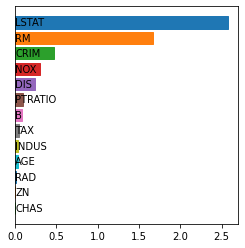

shap_fast


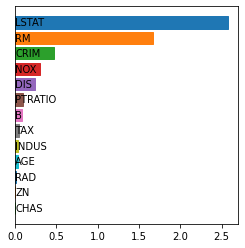

banzhaf_fast


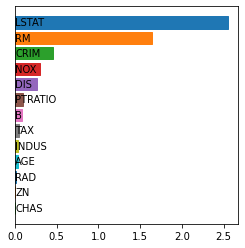

In [20]:
for t,df in feats_importances.items():
    print(t)
    plot = lib.print.plot_vals(df, f'{NAME}_{t}')
    plt.show()